In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
import os
from modules.TravelSurveyAnalysis import TravelSurveyAnalysis

if 'TravelSurvey' in os.getcwd():
    data_folder = '../../data/'
elif 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

## Netherlands

In [2]:
source_folder_path = data_folder + 'netherlands/'
destination_folder_path = data_folder + 'netherlands/'

In [3]:
extended_mode_index_map_ovin = {
                    1: 'Train',
                    2: 'Coach/bus (private bus transport only)',
                    3: 'Subway', 
                    4: 'Tram',
                    5: 'Bus (public transport only)', 
                    6: 'Driver car',
                    7: 'Delivery van',
                    8: 'Truck',
                    9: 'Camper',
                    10: 'Passenger car', 
                    11: 'Cab',
                    12: 'Engine',
                    13: 'Moped',
                    14: 'Moped',
                    15: 'Bicycle (electric and/or non-electric)', 
                    16: 'Ride a bicycle as a passenger',
                    17: 'Agricultural vehicle',
                    18: 'Boat (scheduled service, ferry service)',
                    19: 'Aeroplane',
                    20: 'Skates/inline skates/step',
                    21: 'Disabled transport vehicle',
                    22: 'On foot',
                    23: 'Pram',
                    24: 'Otherwise',
}

# from 2017 onwards
extended_mode_index_map_odin = {
                    1: 'Passenger car',
                    2: 'Train',
                    3: 'Bus', 
                    4: 'Tram',
                    5: 'Subway', 
                    6: 'Speed pedelec',
                    7: 'Electric bike',
                    8: 'Non-electric bicycle',
                    9: 'On foot',
                    10: 'Coach', 
                    11: 'Delivery van',
                    12: 'Truck',
                    13: 'Camper',
                    14: 'Taxi/Taxi van',
                    15: 'Agricultural vehicle', 
                    16: 'Engine',
                    17: 'Moped',
                    18: 'Moped',
                    19: 'Disabled transport vehicle with motor',
                    20: 'Disabled transport vehicle without engine',
                    21: 'Skates/inline skates/step',
                    22: 'Boat',
                    23: 'Different with engine',
                    24: 'Otherwise without engine',
}

In [4]:
expansion_factor_trip = 'FactorV'
expansion_factor_person = 'FactorP'
expansion_factor_family = 'FactorH'
origin_column = 'VertGem'
destination_column = 'AankGem'
residence_column = 'WoGem'

dict_year_data_correspondence = {
    '2010': 'OViN2010_Databestand.csv',
    '2013': 'OViN2013_Databestand.csv',
    '2017': 'OViN2017_Databestand.csv',
    '2018': 'ODiN2018_Databestand_v2.0.csv',
    '2019': 'ODiN2019_Databestand_v2.0.csv',
}

code_column = 'CBS code'

dict_columns_ovin = {
    'Mode Share': {'column': 'Hvm',
                   'index_map': extended_mode_index_map_ovin},
    'Gender': {'column': 'Geslacht',
                   'index_map': {1: 'Man', 2: 'Woman'}},
    'Age': {'column': 'Leeftijd',
                   'index_map': {}}
}

dict_columns_odin = {
    'Mode Share': {'column': 'Hvm',
                   'index_map': extended_mode_index_map_odin},
    'Gender': {'column': 'Geslacht',
                   'index_map': {1: 'Man', 2: 'Woman'}},
    'Age': {'column': 'Leeftijd',
                   'index_map': {}}
}

dict_expansion_factor = {
      'No expansion factor': False,
      'Person expansion factor': expansion_factor_person,
      'Trip expansion factor': expansion_factor_trip,
      'Family expansion factor': expansion_factor_family
}

dict_residence = {
      'Trips within the city': False,
      'Trips made by residents': True
}

In [5]:
tsa = TravelSurveyAnalysis(source_folder_path, destination_folder_path,
                           expansion_factor_trip, expansion_factor_person,
                           origin_column, destination_column, residence_column)

df_codes = tsa.read_data('list_code_municipalities_netherlands.csv')
df_codes = df_codes.set_index('Municipality')

In [6]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import ipywidgets as widgets

def build_dropdown():
    return widgets.Dropdown(options=options,
                            description=description,
                            disabled=False,
                            style= {'description_width': 'initial'},
                            layout={'width': 'max-content'}  )

options=list(dict_year_data_correspondence.keys())
year = options[0]
global read_data
read_data = tsa.read_data(dict_year_data_correspondence[year])
# variable 'data' is the data that contains the information selected. Should always be updated when we change:
# - the year
# - the city
# - if it's residence or not

data = read_data
dict_columns = dict_columns_ovin
description='Choose a year:'

drop_down = build_dropdown()

def dropdown_handler(change):
    global year
    year = change.new
    global read_data
    read_data = tsa.read_data(dict_year_data_correspondence[year])
    global dict_columns
    if int(year) <= 2017:
        read_data = read_data.rename(columns = {'Wogem': 'WoGem'})
        dict_columns = dict_columns_ovin
    else:
        dict_columns = dict_columns_odin
    data_city = tsa.select_city_data(read_data, city_code)
    global data
    data = data_city
    global column
    column = dict_columns[variable]['column']
    global index_map
    index_map = dict_columns[variable]['index_map']
drop_down.observe(dropdown_handler, names='value')
display(drop_down)

options = df_codes.index
city = options[0]
city_code = df_codes.loc[city][code_column]
description='Choose a city:'

drop_down = build_dropdown()

def dropdown_handler(change):
    global city
    city = change.new
    global city_code
    city_code = df_codes.loc[city][code_column]
    data_city = tsa.select_city_data(read_data, city_code)
    global data
    data = data_city
drop_down.observe(dropdown_handler, names='value')
display(drop_down)

options = list(dict_residence.keys())
selected_residence = options[0]
residence = dict_residence[selected_residence]
description='If you chose a city, do you want to consider the trips made within the city or trips made by residents?:'

drop_down = build_dropdown()

def dropdown_handler(change):
    selected_residence = change.new
    global residence
    residence = dict_residence[selected_residence]
    data_city = tsa.select_city_data(read_data, city_code, residence)
    global data
    data = data_city
drop_down.observe(dropdown_handler, names='value')
display(drop_down)

options = list(dict_columns.keys())
variable = options[0]
column = dict_columns[variable]['column']
index_map = dict_columns[variable]['index_map']
description='Choose a variable:'

drop_down = build_dropdown()

def dropdown_handler(change):
    global variable
    variable = change.new
    global column
    column = dict_columns[variable]['column']
    global index_map
    index_map = dict_columns[variable]['index_map']
drop_down.observe(dropdown_handler, names='value')
display(drop_down)

options = list(dict_expansion_factor.keys())
selected_expansion_factor = options[0]
expansion_factor = dict_expansion_factor[selected_expansion_factor]
description='Choose a expansion factor:'

drop_down = build_dropdown()

def dropdown_handler(change):
    selected_expansion_factor = change.new
    global expansion_factor
    expansion_factor = dict_expansion_factor[selected_expansion_factor]

drop_down.observe(dropdown_handler, names='value')
display(drop_down)

Dropdown(description='Choose a year:', layout=Layout(width='max-content'), options=('2010', '2013', '2017', '2…

Dropdown(description='Choose a city:', layout=Layout(width='max-content'), options=('All', 'Aa en Hunze', 'Aal…

Dropdown(description='If you chose a city, do you want to consider the trips made within the city, or trips ma…

Dropdown(description='Choose a variable:', layout=Layout(width='max-content'), options=('Mode Share', 'Gender'…

Dropdown(description='Choose a expansion factor:', layout=Layout(width='max-content'), options=('No expansion …

In [20]:
print(city)
print(city_code)
print(column)
print(index_map)
print(expansion_factor)

Utrecht
344
Hvm
{1: 'Passenger car', 2: 'Train', 3: 'Bus', 4: 'Tram', 5: 'Subway', 6: 'Speed pedelec', 7: 'Electric bike', 8: 'Non-electric bicycle', 9: 'On foot', 10: 'Coach', 11: 'Delivery van', 12: 'Truck', 13: 'Camper', 14: 'Taxi/Taxi van', 15: 'Agricultural vehicle', 16: 'Engine', 17: 'Moped', 18: 'Moped', 19: 'Disabled transport vehicle with motor', 20: 'Disabled transport vehicle without engine', 21: 'Skates/inline skates/step', 22: 'Boat', 23: 'Different with engine', 24: 'Otherwise without engine'}
False


In [21]:
data[column].unique()

array(['9', '8', '#NULL!', '1', '2', '7', '3', '23', '4', '18', '11',
       '21', '5', '17', '14', '16', '10', '24', '19', '12'], dtype=object)

In [22]:
df = tsa.calculate_distribution(data, column, expansion_factor, index_map)
df

,Hvm_new
Non-electric bicycle,30.951374
Passenger car,23.847780
Train,21.014799
On foot,15.517970
Bus,4.968288
Electric bike,1.099366
Tram,0.887949
Moped,0.380550
Delivery van,0.274841
Taxi/Taxi van,0.253700


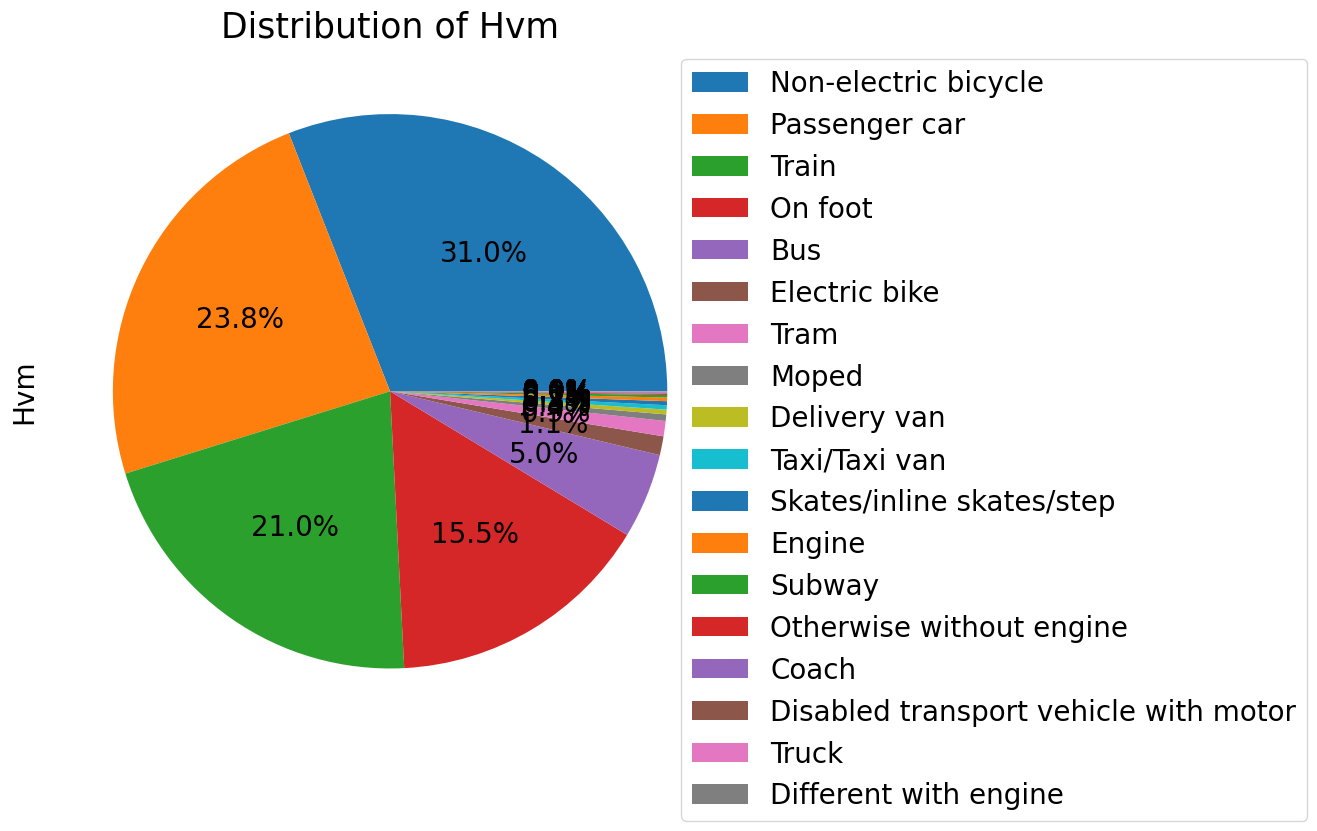

In [23]:
tsa.plot_pie_chart(data, column, expansion_factor, index_map)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=20)


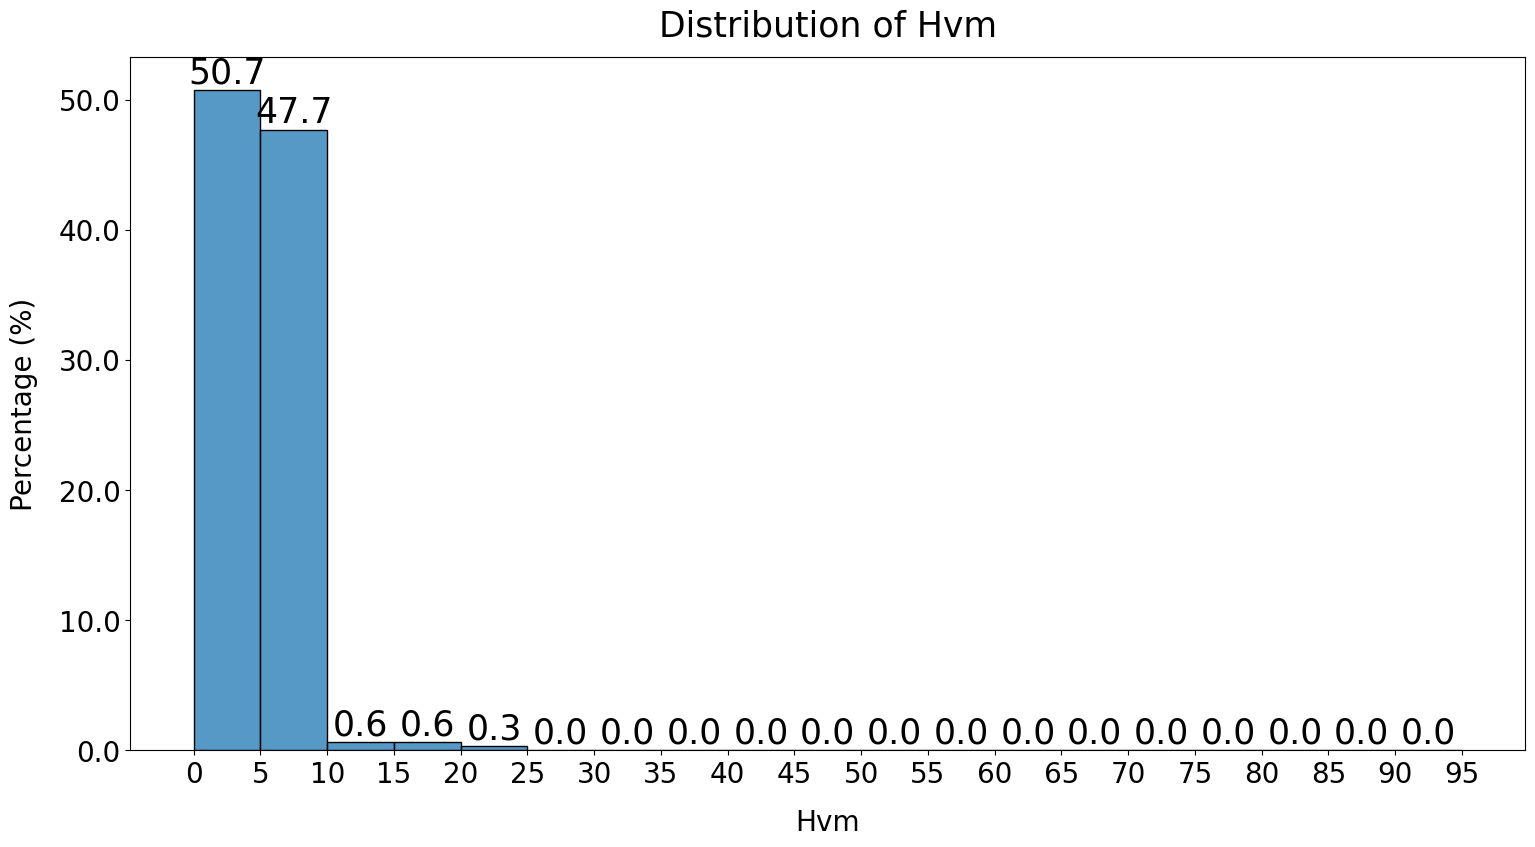

In [25]:
list_bins = list(range(0,100,5))
tsa.plot_histogram(data, column, expansion_factor, list_bins)